In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from pandas import get_dummies
from imblearn.over_sampling import SMOTENC
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
#%matplotlib inline

In [2]:
df = pd.read_csv("framingham.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<AxesSubplot:>

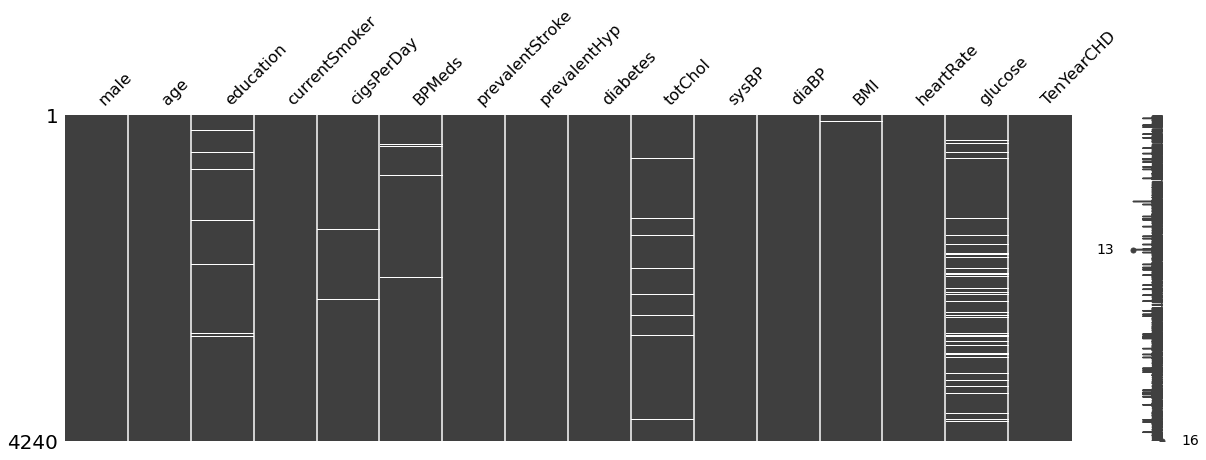

In [5]:
mno.matrix(df, figsize = (20, 6))

# Missing Data in cigsPerDay Column

#we find the data to be skewed, hence go ahead with median instead of mean
###### There were 29 missing values in cigsPerDay column. They were replaced by the median of the column.

(array([8.40655426e-02, 1.04148998e-02, 3.27713132e-02, 2.06941005e-03,
        7.42952132e-03, 3.49424975e-03, 2.00156054e-03, 2.03548529e-04,
        3.73172304e-04, 3.39247549e-05]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 [<matplotlib.patches.Polygon at 0x159ac632ca0>])

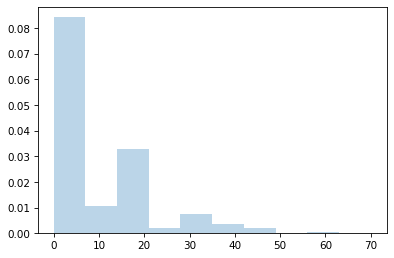

In [6]:
fig, axe = plt.subplots(dpi=75)
axe.hist(df['cigsPerDay'], bins=10, density=True, histtype='stepfilled', alpha=0.3, label="cigs per day")

In [5]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(int(df['cigsPerDay'].median()))

<AxesSubplot:>

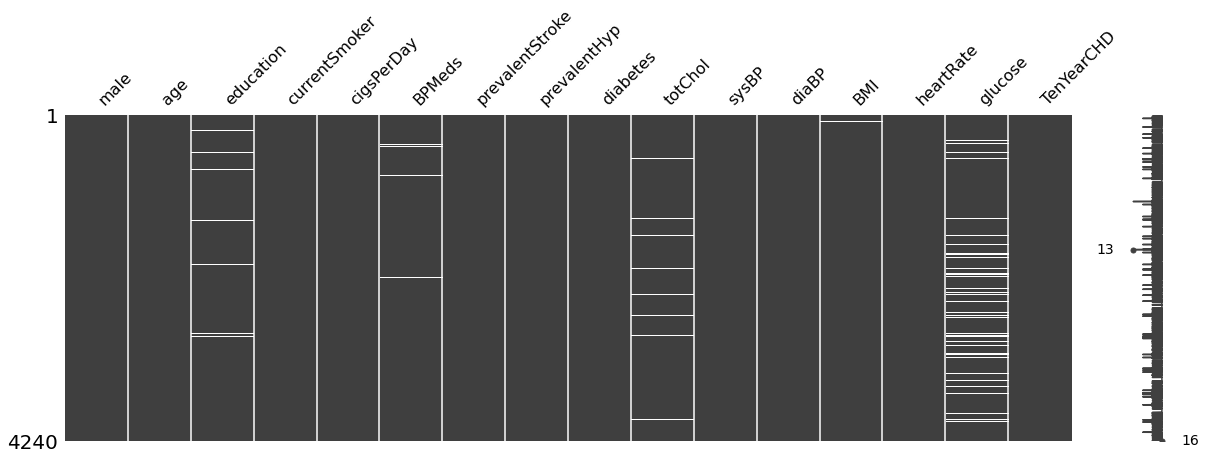

In [8]:
mno.matrix(df, figsize = (20, 6))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Missing Data in totChol Column
#almost like normal distribution, hence mean can be used to impute

###### There were 50 missing values in cigsPerDay column. They were replaced by the mean of the column.

(array([6.64529906e-04, 6.30087807e-03, 7.69071806e-03, 2.03816185e-03,
        2.43120697e-04, 2.83640813e-05, 4.05201162e-06, 0.00000000e+00,
        4.05201162e-06, 4.05201162e-06]),
 array([107. , 165.9, 224.8, 283.7, 342.6, 401.5, 460.4, 519.3, 578.2,
        637.1, 696. ]),
 [<matplotlib.patches.Polygon at 0x159ac670c70>])

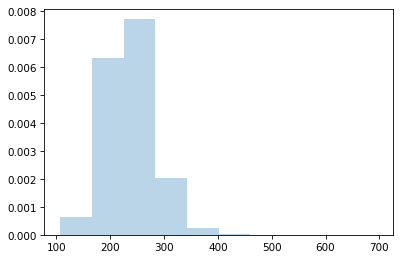

In [10]:
fig, axe = plt.subplots(dpi=75)
axe.hist(df['totChol'], bins=10, density=True, histtype='stepfilled', alpha=0.3, label="totChol")

In [6]:
df['totChol'] = df['totChol'].fillna(int(df['totChol'].mean()))

<AxesSubplot:>

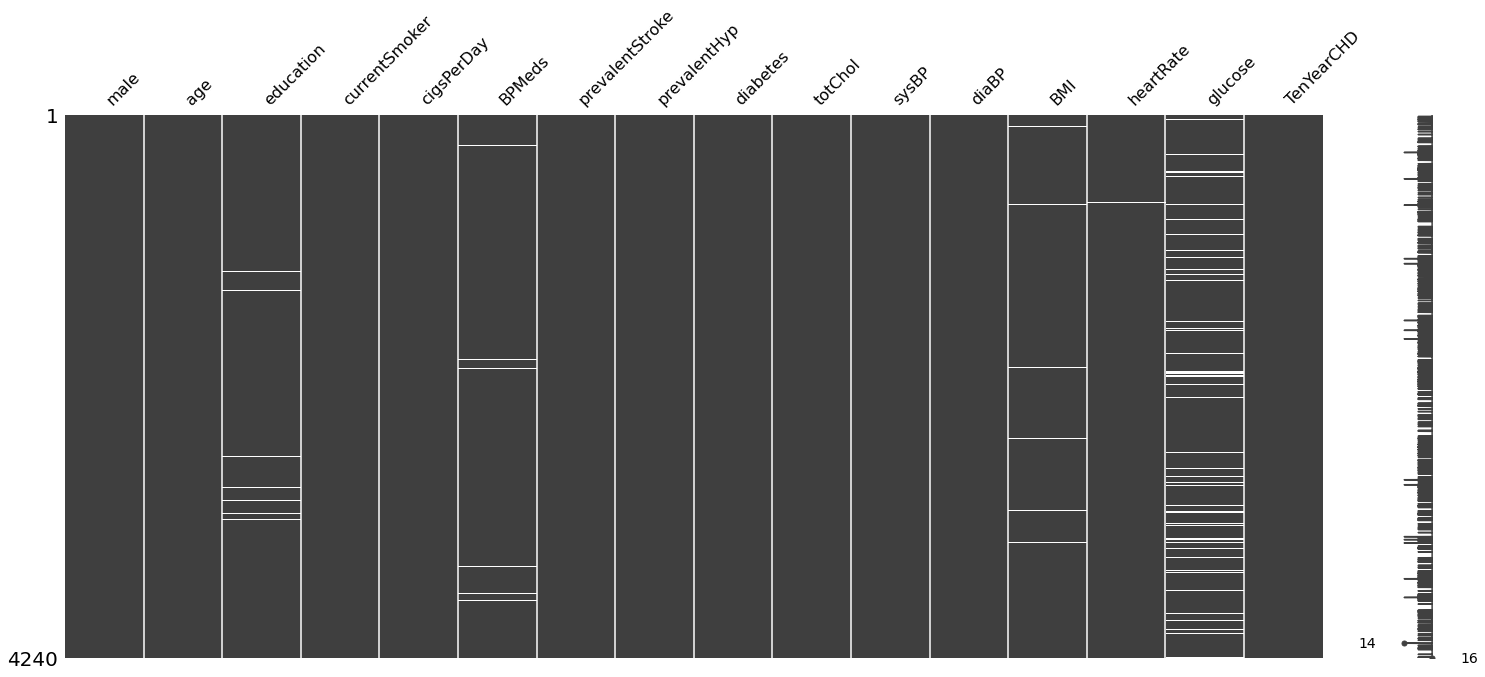

In [12]:
mno.matrix(df, figsize = (25, 10))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Missing Data in BMI Column
Data is normally distributed hence mean can be used to impute

###### There were 18 missing values in BMI column. They were replaced by the mean of the column.

(array([9.07219781e-03, 6.95343769e-02, 1.00540623e-01, 4.73132342e-02,
        1.12541188e-02, 3.33030046e-03, 9.76122550e-04, 2.29675894e-04,
        5.74189735e-05, 5.74189735e-05]),
 array([15.54 , 19.666, 23.792, 27.918, 32.044, 36.17 , 40.296, 44.422,
        48.548, 52.674, 56.8  ]),
 [<matplotlib.patches.Polygon at 0x159add3dbb0>])

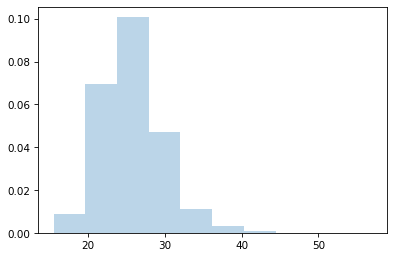

In [14]:
fig, axe = plt.subplots(dpi=75)
axe.hist(df['BMI'], bins=10, density=True, histtype='stepfilled', alpha=0.3, label="BMI")

In [7]:
df['BMI'] = df['BMI'].fillna(float("{:.2f}".format(df['BMI'].mean())))

In [16]:
df['BMI'].mean()

25.80079716981132

In [17]:
df['BMI'].median()

25.41

<AxesSubplot:>

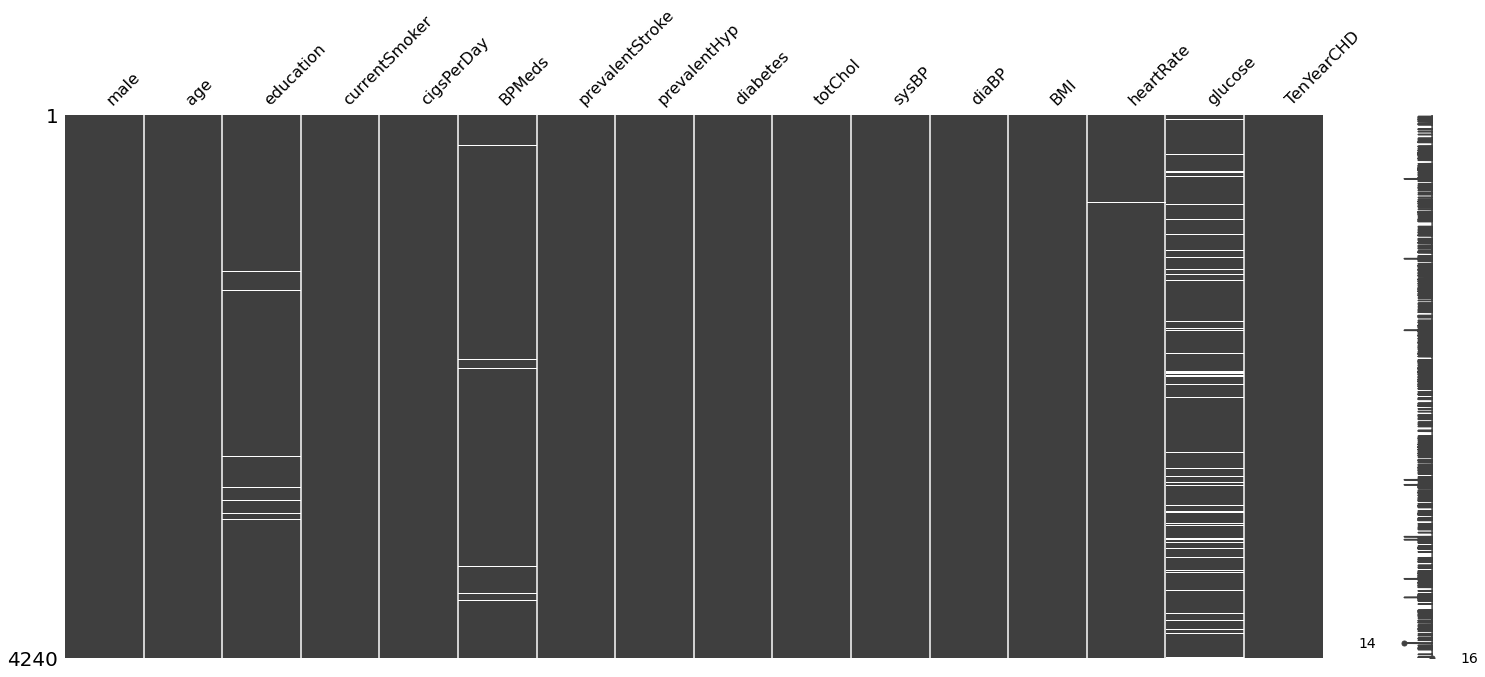

In [18]:
mno.matrix(df, figsize = (25, 10))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Missing Data in heartRate Column

###### There were 1 missing values in heartRate column. They were replaced by the mean of the column.

(array([1.45355418e-03, 1.28198713e-02, 3.00480626e-02, 3.23356233e-02,
        1.53933770e-02, 6.81502451e-03, 1.66801299e-03, 3.33602598e-04,
        9.53150281e-05, 4.76575140e-05]),
 array([ 44. ,  53.9,  63.8,  73.7,  83.6,  93.5, 103.4, 113.3, 123.2,
        133.1, 143. ]),
 [<matplotlib.patches.Polygon at 0x159add7a910>])

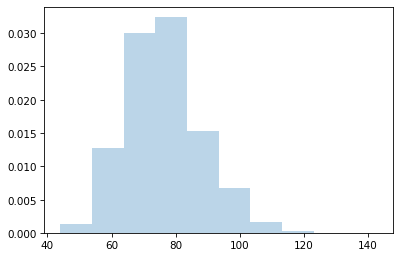

In [20]:
fig, axe = plt.subplots(dpi=75)
axe.hist(df['heartRate'], bins=10, density=True, histtype='stepfilled', alpha=0.3, label="heartRate")

In [8]:
df['heartRate'] = df['heartRate'].fillna(int(df['heartRate'].mean()))

<AxesSubplot:>

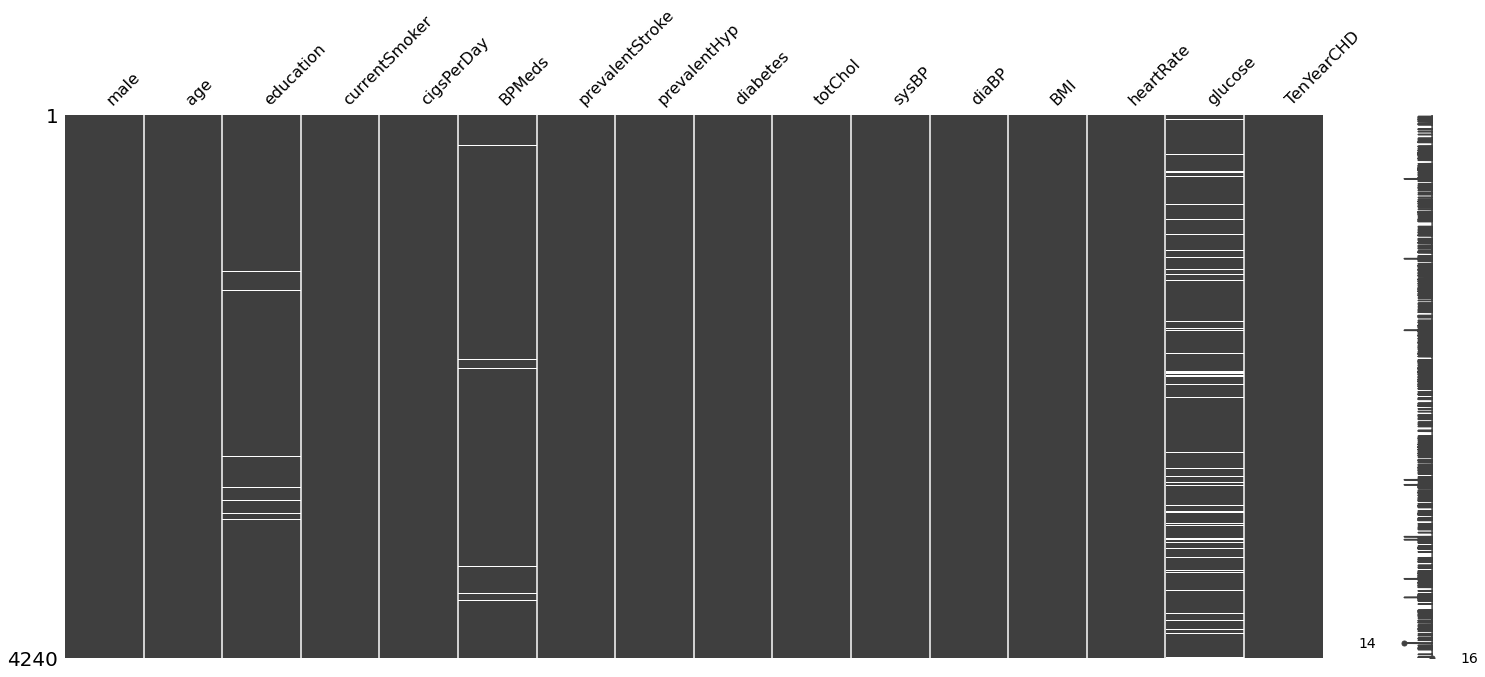

In [22]:
mno.matrix(df, figsize = (25, 10))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Missing Data in BPMeds Column
V high frequency for one value, therefore mode used

###### There were 52 missing values in BPMeds column. They were replaced by the mode of the column.

(array([9.70384524, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.29615476]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [<matplotlib.patches.Polygon at 0x159adfb3ee0>])

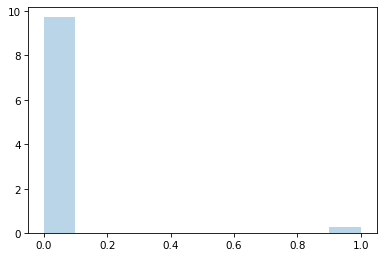

In [24]:
fig, axe = plt.subplots(dpi=75)
axe.hist(df['BPMeds'], bins=10, density=True, histtype='stepfilled', alpha=0.3, label="BPMeds")

In [9]:
df['BPMeds'] = df['BPMeds'].fillna(int(df['BPMeds'].mode()))

<AxesSubplot:>

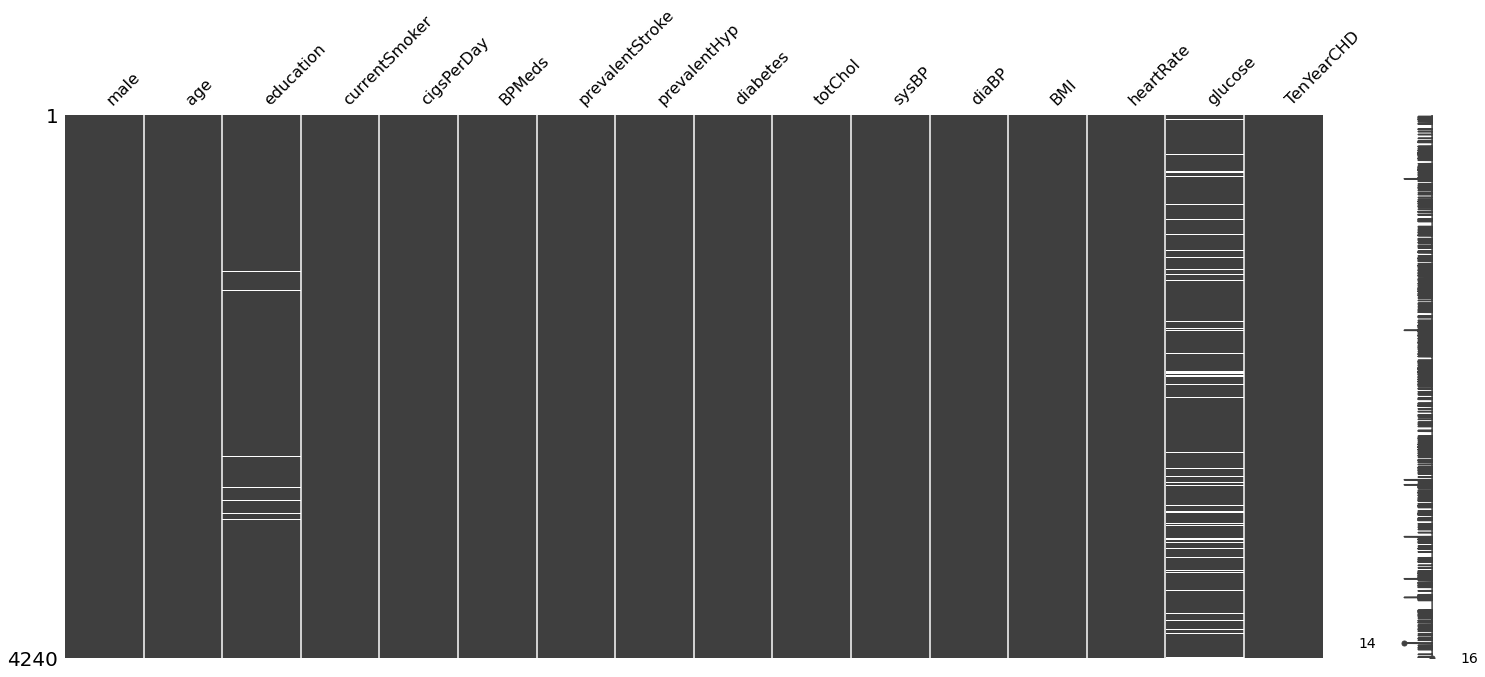

In [26]:
mno.matrix(df, figsize = (25, 10))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Missing Data in education Column

###### There were 104 missing values in education column. They were replaced by the same values in the df['education'] column and in the same ratio.

In [19]:
# use one hot encoding for this column

(array([1.38653769, 0.        , 0.        , 1.01007658, 0.        ,
        0.        , 0.5554212 , 0.        , 0.        , 0.38129786]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 [<matplotlib.patches.Polygon at 0x159ae0e8580>])

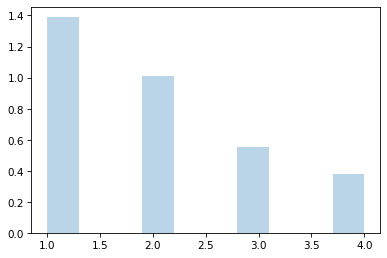

In [28]:
fig, axe = plt.subplots(dpi=75)
axe.hist(df['education'], bins=10, density=True, histtype='stepfilled', alpha=0.3, label="education")

In [10]:
df = df.dropna(subset=['education'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4135 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4135 non-null   int64  
 1   age              4135 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4135 non-null   int64  
 4   cigsPerDay       4135 non-null   float64
 5   BPMeds           4135 non-null   float64
 6   prevalentStroke  4135 non-null   int64  
 7   prevalentHyp     4135 non-null   int64  
 8   diabetes         4135 non-null   int64  
 9   totChol          4135 non-null   float64
 10  sysBP            4135 non-null   float64
 11  diaBP            4135 non-null   float64
 12  BMI              4135 non-null   float64
 13  heartRate        4135 non-null   float64
 14  glucose          3755 non-null   float64
 15  TenYearCHD       4135 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 549.2 KB


In [11]:
education_dummies = pd.get_dummies(df['education'], prefix='education', prefix_sep='_')

In [12]:
education_dummies

,education_1.0,education_2.0,education_3.0,education_4.0
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
4235,0,1,0,0
4236,1,0,0,0
4237,0,1,0,0
4238,0,0,1,0


In [13]:
type(education_dummies)

pandas.core.frame.DataFrame

In [14]:
df = pd.concat([df,education_dummies], axis=1)

In [13]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,0,1,0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0,1,0,0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,0,1,0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0,0,0,1,0


In [15]:
df = df.drop('education', axis =1)

In [15]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,0,1,0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0,1,0,0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,0,1,0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0,0,0,1,0


In [118]:
#z = df.education.value_counts()

In [119]:
#df['education'].value_counts(normalize=True, dropna=False)

In [120]:
df['education'] = df['education'].fillna(pd.Series(np.random.choice(['1', '2', '3', '4'], p=[0.411, 0.302, 0.169, 0.118], size=len(df))))

<AxesSubplot:>

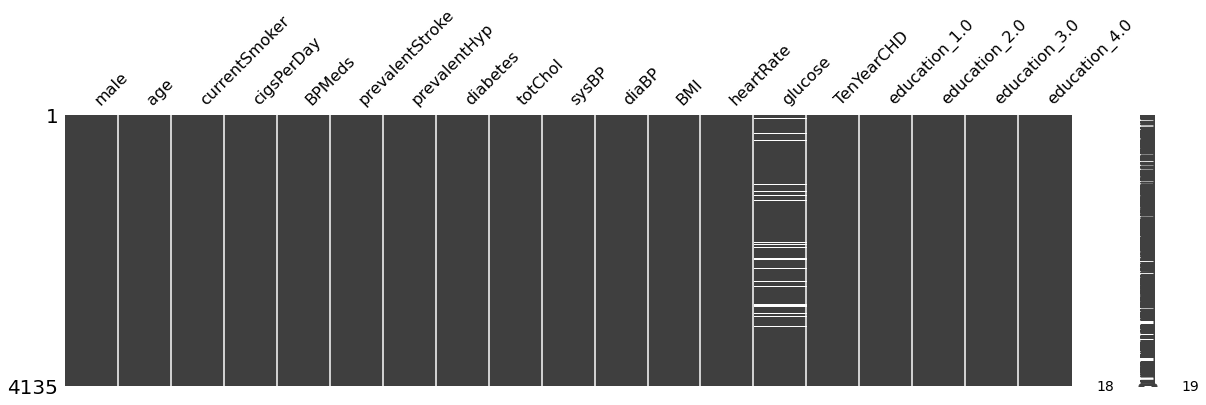

In [18]:
mno.matrix(df, figsize = (20, 5))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4135 entries, 0 to 4239
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4135 non-null   int64  
 1   age              4135 non-null   int64  
 2   currentSmoker    4135 non-null   int64  
 3   cigsPerDay       4135 non-null   float64
 4   BPMeds           4135 non-null   float64
 5   prevalentStroke  4135 non-null   int64  
 6   prevalentHyp     4135 non-null   int64  
 7   diabetes         4135 non-null   int64  
 8   totChol          4135 non-null   float64
 9   sysBP            4135 non-null   float64
 10  diaBP            4135 non-null   float64
 11  BMI              4135 non-null   float64
 12  heartRate        4135 non-null   float64
 13  glucose          3755 non-null   float64
 14  TenYearCHD       4135 non-null   int64  
 15  education_1.0    4135 non-null   uint8  
 16  education_2.0    4135 non-null   uint8  
 17  education_3.0 

# Missing Data in glucose Column

### MICE is a multiple imputation method used to replace missing data values in a data set under certain assumptions about the data missingness mechanism (e.g., the data are missing at random, the data are missing completely at random).
###### There were 388 missing values in glucose column. They were imputated using Regression Imputation.


In [16]:
from fancyimpute import IterativeImputer

In [17]:
mice_imputer = IterativeImputer()
df = mice_imputer.fit_transform(df)

In [18]:
df = pd.DataFrame(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4135 entries, 0 to 4134
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4135 non-null   float64
 1   1       4135 non-null   float64
 2   2       4135 non-null   float64
 3   3       4135 non-null   float64
 4   4       4135 non-null   float64
 5   5       4135 non-null   float64
 6   6       4135 non-null   float64
 7   7       4135 non-null   float64
 8   8       4135 non-null   float64
 9   9       4135 non-null   float64
 10  10      4135 non-null   float64
 11  11      4135 non-null   float64
 12  12      4135 non-null   float64
 13  13      4135 non-null   float64
 14  14      4135 non-null   float64
 15  15      4135 non-null   float64
 16  16      4135 non-null   float64
 17  17      4135 non-null   float64
 18  18      4135 non-null   float64
dtypes: float64(19)
memory usage: 613.9 KB


In [20]:
df.columns = 'male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD','education_1.0','education_2.0','education_3.0','education_4.0'

<AxesSubplot:>

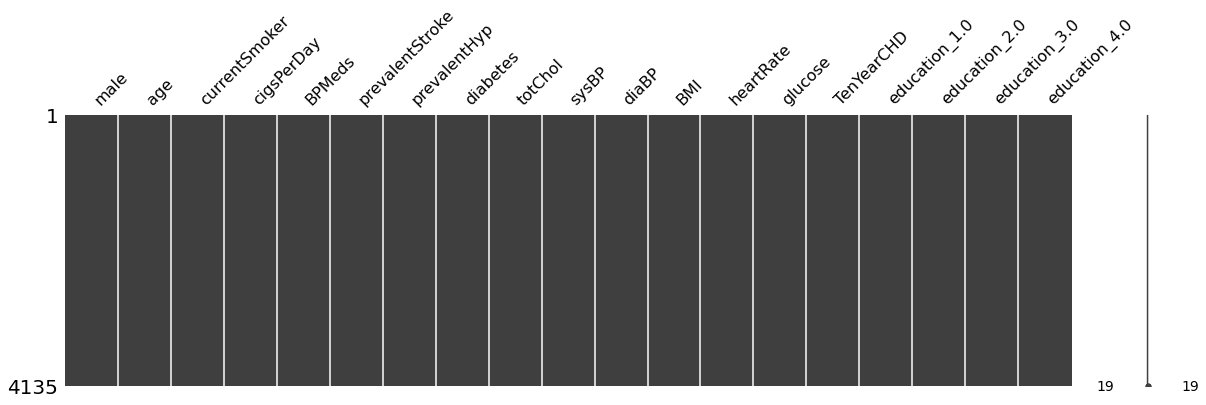

In [21]:
mno.matrix(df, figsize = (20, 5))

In [22]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)

In [23]:
y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: TenYearCHD, dtype: float64

In [24]:
y.shape

(4135,)

In [25]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,0.0,0.0,1.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,1.0,0.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,1.0,0.0,0.0,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,0.0,0.0,1.0,0.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,0.0,1.0,0.0


In [26]:
X.shape

(4135, 18)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
X_train.shape

(2894, 18)

In [52]:
y_train.shape

(2894,)

In [53]:
X_test.shape

(1241, 18)

In [54]:
y_test.shape

(1241,)

In [28]:
lr_regressor = LogisticRegression(max_iter=10000)
model=lr_regressor.fit(X_train,y_train)

In [29]:
print('model score is:')
print(model.score(X_train,y_train))
print('\n model coeff are:')
print(model.coef_)
y_predict = model.predict(X_test)

model score is:
0.8614374568071873

 model coeff are:
[[ 4.58038754e-01  6.44560116e-02 -1.55026333e-01  2.43482790e-02
   4.28969572e-01  2.08471860e-01  4.31358425e-01  2.58585804e-01
   1.94332106e-03  1.06061095e-02 -6.36681742e-03  2.73537246e-03
   3.57464593e-04  4.30519934e-03  1.53183814e-02 -1.47656528e-01
  -8.04271934e-02  1.73177730e-01]]


In [30]:
print('classification report')
print(classification_report(y_test,y_predict, target_names = ["Don't have CHD","Have CHD"] ))
print('confusion matrix')
print(confusion_matrix(y_test,y_predict ))

classification report
                precision    recall  f1-score   support

Don't have CHD       0.84      1.00      0.91      1034
      Have CHD       0.75      0.06      0.11       207

      accuracy                           0.84      1241
     macro avg       0.80      0.53      0.51      1241
  weighted avg       0.83      0.84      0.78      1241

confusion matrix
[[1030    4]
 [ 195   12]]


# Trying Ridge classifier
Gives poor results since the data set is imbalanced -- f1 = 0.92, 0.1

In [31]:
ridge_classi = RidgeClassifier(max_iter=10000)
model=ridge_classi.fit(X_train,y_train)

In [32]:
print('model score is:')
print(model.score(X_train,y_train))
print('\n model coeff are:')
print(model.coef_)
y_predict = model.predict(X_test)

model score is:
0.8565998617829993

 model coeff are:
[[ 9.61867891e-02  1.38747810e-02 -3.65187151e-02  5.66312866e-03
   1.81690578e-01  1.21913969e-01  1.12800321e-01  1.03285528e-01
   1.99243540e-04  3.61254782e-03 -3.02359196e-03 -7.31021979e-04
   8.66552601e-05  1.42215378e-03  8.64450651e-03 -3.00143731e-02
  -1.58860261e-02  3.72558927e-02]]


In [33]:
print('classification report')
print(classification_report(y_test,y_predict, target_names = ["Don't have CHD","Have CHD"] ))
print('confusion matrix')
print(confusion_matrix(y_test,y_predict ))

classification report
                precision    recall  f1-score   support

Don't have CHD       0.83      1.00      0.91      1034
      Have CHD       1.00      0.01      0.02       207

      accuracy                           0.83      1241
     macro avg       0.92      0.50      0.46      1241
  weighted avg       0.86      0.83      0.76      1241

confusion matrix
[[1034    0]
 [ 205    2]]


# Ridge classifier with alpha loop with balanced weights
Gives f1 score of 0.76, 0.36
0.76, 0.41 after dummies

In [34]:
for i in range(0,10,1):
    ridge_classi = RidgeClassifier(alpha= i/10, class_weight= "balanced")
    model=ridge_classi.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    print("alpha is :", i/10)
    print(model.coef_)
    print(classification_report(y_test,y_predict))

alpha is : 0.0
[[ 1.74086620e-01  2.95431348e-02 -4.57446848e-02  1.00411691e-02
   1.76395097e-01  1.66560363e-01  2.12648374e-01  1.57353954e-01
   7.72781699e-04  3.45801637e-03 -1.80769145e-03  4.15189659e-03
   2.31123276e-04  8.13325154e-04  7.07401982e+11  7.07401982e+11
   7.07401982e+11  7.07401982e+11]]
              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76      1034
         1.0       0.29      0.69      0.41       207

    accuracy                           0.66      1241
   macro avg       0.60      0.67      0.58      1241
weighted avg       0.81      0.66      0.70      1241

alpha is : 0.1
[[ 0.17397099  0.02956814 -0.04539835  0.01003647  0.17585375  0.16483119
   0.21200349  0.15600114  0.0007733   0.00347376 -0.00179921  0.00408502
   0.0002317   0.00081088  0.01738143 -0.04443557 -0.03950314  0.06655728]]
              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76      1034
         1

# Trying Lasso (logistic with L1 penalty) with the liblinear solver with balanced 
gives f1 score of 0.76, 0.36
76, 41 after dummies

In [35]:
for i in range(1,10,1):
    lr_regressor = LogisticRegression(penalty='l1',C = i/10,max_iter=10000, solver='liblinear', class_weight='balanced')
    model=lr_regressor.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    print("alpha is :", i/10)
    print(model.coef_)
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))

alpha is : 0.1
[[ 0.30504747  0.05549484 -0.05013274  0.02029343  0.10861931  0.
   0.60940137  0.          0.00063956  0.00914553 -0.01122247 -0.00462623
  -0.00684441  0.0033156   0.         -0.14347101 -0.07228143  0.        ]]
              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77      1034
         1.0       0.29      0.70      0.41       207

    accuracy                           0.66      1241
   macro avg       0.60      0.68      0.59      1241
weighted avg       0.81      0.66      0.71      1241

[[679 355]
 [ 62 145]]
alpha is : 0.2
[[ 0.36215673  0.06109539 -0.08519693  0.02224438  0.29123478  0.
   0.5272554   0.08078753  0.0012592   0.00920237 -0.00791382  0.00103915
  -0.00311082  0.00352395  0.         -0.15612451 -0.10900127  0.00700556]]
              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76      1034
         1.0       0.29      0.69      0.41       207

    accuracy            

# Trying Lasso (logistic with L1 penalty) with the saga solver with balanced
Liblinear seems to do better than saga

In [36]:
for i in range(1,10,1):
    lr_regressor = LogisticRegression(penalty='l1',C = i/10,max_iter=10000, solver='saga', class_weight='balanced')
    model=lr_regressor.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    print("alpha is :", i/10)
    print(model.coef_)
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))

alpha is : 0.1
[[ 0.22597205  0.04171068 -0.14215661  0.02094816  0.10969571  0.
   0.73498095  0.06516058 -0.00078986  0.00961345 -0.01897623 -0.02396704
  -0.01546757  0.00187938  0.         -0.21116422 -0.11302229  0.        ]]
              precision    recall  f1-score   support

         0.0       0.91      0.64      0.75      1034
         1.0       0.28      0.69      0.40       207

    accuracy                           0.65      1241
   macro avg       0.59      0.66      0.57      1241
weighted avg       0.81      0.65      0.69      1241

[[665 369]
 [ 65 142]]
alpha is : 0.2
[[ 2.56214593e-01  4.19456811e-02 -1.89369017e-01  2.23173340e-02
   1.75111978e-01  0.00000000e+00  7.65806086e-01  1.33697352e-01
  -6.87636693e-04  9.17286394e-03 -1.89439068e-02 -2.46283133e-02
  -1.49353526e-02  1.62689167e-03  0.00000000e+00 -2.40922980e-01
  -1.53631878e-01  0.00000000e+00]]
              precision    recall  f1-score   support

         0.0       0.91      0.64      0.75      

# SVC with Gridsearch
Gives F1 score 0.80, 0.34 (0.4 after)

In [37]:
svc_classifier = SVC()
parameters = {
    'class_weight':['balanced'],
    'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1],
    'kernel':['poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3,4]
    
}
model = GridSearchCV(estimator =svc_classifier,param_grid = parameters, cv = 5, scoring = 'f1' )
model_cv=model.fit(X_train,y_train)
y_predict = model_cv.predict(X_test)
#print("C is :", i/10)
    #print(model.coef_)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

KeyboardInterrupt: 

# trying to scale data

In [38]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc =  scaler.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [39]:
X_train_sc

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
0,-0.868297,-0.765970,1.001383,-0.334613,-0.16533,-0.067174,-0.667499,-0.158589,0.298744,-1.014647,-1.078861,-1.135306,-1.002220,0.162434,-0.832104,-0.663715,2.201469,-0.358755
1,1.151680,-0.883251,1.001383,2.627539,-0.16533,-0.067174,-0.667499,-0.158589,0.184495,-1.243614,-1.078861,-0.824720,-0.917942,-0.561440,-0.832104,1.506671,-0.454242,-0.358755
2,1.151680,-1.352373,-0.998619,-0.757778,-0.16533,-0.067174,1.498130,-0.158589,0.435843,-0.419333,0.765236,-0.088608,-1.170775,0.026707,-0.832104,1.506671,-0.454242,-0.358755
3,-0.868297,1.579639,-0.998619,-0.757778,-0.16533,-0.067174,1.498130,-0.158589,0.458692,1.732958,1.854930,-0.071489,0.261949,0.252918,1.201772,-0.663715,-0.454242,-0.358755
4,1.151680,-0.179568,1.001383,0.511716,-0.16533,-0.067174,-0.667499,-0.158589,0.070247,-0.281952,0.094655,0.009214,-0.243719,-0.968619,1.201772,-0.663715,-0.454242,-0.358755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889,-0.868297,-0.062288,-0.998619,-0.757778,-0.16533,-0.067174,1.498130,-0.158589,-0.089701,0.771296,0.723325,0.060571,-0.665108,-0.163140,1.201772,-0.663715,-0.454242,-0.358755
2890,1.151680,0.054993,-0.998619,-0.757778,-0.16533,-0.067174,1.498130,-0.158589,-0.409598,0.588123,1.435817,0.116819,0.177671,1.203002,1.201772,-0.663715,-0.454242,-0.358755
2891,-0.868297,-1.586934,-0.998619,-0.757778,-0.16533,-0.067174,-0.667499,-0.158589,-0.638095,-1.152027,-0.785482,-1.025256,-0.075163,-0.380472,-0.832104,1.506671,-0.454242,-0.358755
2892,-0.868297,1.696919,-0.998619,-0.757778,-0.16533,-0.067174,1.498130,-0.158589,0.961387,1.824545,0.346123,-0.433431,0.346227,-0.516198,-0.832104,1.506671,-0.454242,-0.358755


In [40]:
X_test_sc

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
0,1.151680,-0.648690,-0.998619,-0.757778,-0.165330,-0.067174,1.498130,-0.158589,0.527242,-0.236159,-0.240635,1.444756,-0.580830,-0.380472,1.201772,-0.663715,-0.454242,-0.358755
1,-0.868297,0.054993,1.001383,0.088552,-0.165330,-0.067174,1.498130,-0.158589,1.395532,1.091850,0.597591,-0.377183,-0.075163,0.841065,-0.832104,1.506671,-0.454242,-0.358755
2,1.151680,-1.352373,-0.998619,-0.757778,-0.165330,-0.067174,-0.667499,-0.158589,-0.729494,-0.327746,0.178478,0.549682,-1.339331,0.117191,1.201772,-0.663715,-0.454242,-0.358755
3,-0.868297,0.641395,-0.998619,-0.757778,6.048505,-0.067174,1.498130,-0.158589,1.098485,1.183437,1.268172,1.087704,-0.496552,0.298160,-0.832104,1.506671,-0.454242,-0.358755
4,-0.868297,-0.414129,-0.998619,-0.757778,-0.165330,-0.067174,1.498130,-0.158589,0.504392,1.870339,1.603462,0.351592,0.767616,-0.289987,-0.832104,-0.663715,2.201469,-0.358755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,-0.868297,0.524115,-0.998619,-0.757778,-0.165330,-0.067174,-0.667499,-0.158589,-0.912292,0.267569,-0.240635,1.476548,-0.327996,-0.380472,1.201772,-0.663715,-0.454242,-0.358755
1237,1.151680,0.172273,-0.998619,-0.757778,-0.165330,-0.067174,-0.667499,-0.158589,0.527242,-0.213262,0.765236,1.760232,-1.676443,0.524370,-0.832104,-0.663715,-0.454242,2.787418
1238,-0.868297,0.406834,-0.998619,-0.757778,-0.165330,-0.067174,1.498130,-0.158589,-1.300738,2.396963,2.315954,0.417622,-1.170775,-0.335229,1.201772,-0.663715,-0.454242,-0.358755
1239,1.151680,-1.704214,1.001383,0.934881,-0.165330,-0.067174,-0.667499,-0.158589,-0.226800,-1.197821,-0.827393,0.852931,-0.496552,-0.109019,-0.832104,1.506671,-0.454242,-0.358755


# Ridge with scaled data
No improvement as such

In [157]:
for i in range(0,10,1):
    ridge_classi = RidgeClassifier(alpha= i/10, class_weight= "balanced")
    model=ridge_classi.fit(X_train_sc,y_train)
    y_predict = model.predict(X_test_sc)
    print("alpha is :", i/10)
    print(model.coef_)
    print(classification_report(y_test,y_predict))

alpha is : 0.0
[[ 0.08613762  0.2521095  -0.02270622  0.11859201  0.02832326  0.01108077
   0.09791796  0.02417435  0.03384223  0.07583432 -0.0214673   0.01670212
   0.00274826  0.01789633  0.25745973  0.21278292  0.17575592  0.18207427]]
              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76      1034
         1.0       0.29      0.69      0.41       207

    accuracy                           0.66      1241
   macro avg       0.60      0.67      0.58      1241
weighted avg       0.81      0.66      0.70      1241

alpha is : 0.1
[[ 0.08613603  0.25210003 -0.0226984   0.11858113  0.02832296  0.01108088
   0.09791548  0.02417398  0.03384288  0.07583363 -0.02146298  0.01670165
   0.00274832  0.01789715  0.01144533 -0.01776056 -0.0126556   0.02303381]]
              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76      1034
         1.0       0.29      0.69      0.41       207

    accuracy                   

# SVC with scaled 
No improvement, f1 scores , 0.75, 0.35
### 0.76, 0.4 after dummies and scaling

In [158]:
svc_classifier = SVC()
parameters = {
    'class_weight':['balanced'],
    'C': [0.1,0.2,0.5,0.8, 1],
    'kernel':['poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3]
    
}
model = GridSearchCV(estimator =svc_classifier,param_grid = parameters, cv = 5, scoring = 'f1' )
model_cv=model.fit(X_train_sc,y_train)
y_predict = model_cv.predict(X_test_sc)
#print("C is :", i/10)
    #print(model.coef_)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(model.best_estimator_)

              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76      1034
         1.0       0.29      0.69      0.40       207

    accuracy                           0.66      1241
   macro avg       0.60      0.67      0.58      1241
weighted avg       0.81      0.66      0.70      1241

[[679 355]
 [ 65 142]]
SVC(C=0.1, class_weight='balanced', degree=1, kernel='poly')


# Random forest 
### best till now
F1 score 0.83, 0.34
### 0.82, 0.39 after dummies


In [159]:
random_forest_classifier = RandomForestClassifier()


parameters = {
    'class_weight':['balanced'],
#    'n_estimators': [100,200,500,1000],
    'n_estimators': [10,20,30,40,50,60,80,100],    
    'criterion':['gini', 'entropy'],
#    'min_samples_leaf' : [5,10,20,50]
    'min_samples_leaf' : [7,10,15,20]
    
}
model = GridSearchCV(estimator =random_forest_classifier,param_grid = parameters, cv = 5, scoring = 'f1' )
model_cv=model.fit(X_train_sc,y_train)
y_predict = model_cv.predict(X_test_sc)
#print("C is :", i/10)
    #print(model.coef_)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(model.best_estimator_)

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      1034
         1.0       0.31      0.53      0.39       207

    accuracy                           0.72      1241
   macro avg       0.60      0.64      0.61      1241
weighted avg       0.79      0.72      0.75      1241

[[789 245]
 [ 98 109]]
RandomForestClassifier(class_weight='balanced', min_samples_leaf=20,
                       n_estimators=30)


# trying SMOTE

In [50]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,0.0,0.0,0.0,1.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,0.0,1.0,0.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,1.0,0.0,0.0,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,0.0,0.0,1.0,0.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,0.0,0.0,1.0,0.0


In [57]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

#SMOTENC is used in case of continuous as well as categorical data
sm = SMOTENC(random_state=42,categorical_features=[0,2,4,5,6,7,14,15,16,17])
                                                   #male ,'currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD','education_1.0','education_2.0','education_3.0','education_4.0'])
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 421
Before OverSampling, counts of label '0': 2473 

After OverSampling, the shape of train_X: (4946, 18)
After OverSampling, the shape of train_y: (4946,) 

After OverSampling, counts of label '1': 2473
After OverSampling, counts of label '0': 2473


In [58]:
X_train_res

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
0,0.0,43.000000,1.0,5.000000,0.0,0.0,0.0,0.0,250.000000,110.000000,70.000000,21.140000,64.000000,85.000000,0.0,0.0,1.0,0.0
1,1.0,42.000000,1.0,40.000000,0.0,0.0,0.0,0.0,245.000000,105.000000,70.000000,22.410000,65.000000,69.000000,0.0,1.0,0.0,0.0
2,1.0,38.000000,0.0,0.000000,0.0,0.0,1.0,0.0,256.000000,123.000000,92.000000,25.420000,62.000000,82.000000,0.0,1.0,0.0,0.0
3,0.0,63.000000,0.0,0.000000,0.0,0.0,1.0,0.0,257.000000,170.000000,105.000000,25.490000,79.000000,87.000000,1.0,0.0,0.0,0.0
4,1.0,48.000000,1.0,15.000000,0.0,0.0,0.0,0.0,240.000000,126.000000,84.000000,25.820000,73.000000,60.000000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,1.0,61.743073,1.0,21.536523,0.0,0.0,1.0,0.0,253.564232,177.435768,103.178841,23.884433,95.486145,77.692695,1.0,0.0,0.0,0.0
4942,1.0,58.298851,1.0,15.747127,0.0,0.0,0.0,0.0,270.206894,127.500000,78.454022,26.174253,76.057469,67.344829,1.0,0.0,0.0,0.0
4943,1.0,47.596943,1.0,18.992358,0.0,0.0,0.0,0.0,235.193886,116.996179,68.003821,27.926742,75.000000,66.186245,1.0,0.0,0.0,0.0
4944,1.0,64.147630,1.0,24.672165,0.0,0.0,1.0,0.0,215.655670,148.057319,95.196701,29.201299,81.868866,88.786804,0.0,0.0,0.0,0.0


In [66]:
X_train_res['education_4.0'].value_counts()

0.0    4544
1.0     402
Name: education_4.0, dtype: int64

# ridge with smote
### 0.75, 0.56 recall

In [76]:
for i in range(0,20,2):
    ridge_classi = RidgeClassifier(alpha= i/10)
    model=ridge_classi.fit(X_train_res,y_train_res)
    y_predict = model.predict(X_test)
    print("alpha is :", i/10)
    print(model.coef_)
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))

alpha is : 0.0
[[ 2.40387405e-01  2.48880192e-02 -1.65694448e-01  9.87244334e-03
  -2.20716244e-01 -3.13794692e-01  5.51838339e-02 -1.42506807e-01
   1.59468986e-04  4.68024776e-03 -6.27891957e-04 -2.71844500e-03
  -2.14019657e-05  1.82556179e-03 -8.34965832e-01 -1.17187374e+00
  -1.43890457e+00 -1.25360255e+00]]
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81      1034
         1.0       0.31      0.56      0.40       207

    accuracy                           0.72      1241
   macro avg       0.60      0.65      0.60      1241
weighted avg       0.80      0.72      0.74      1241

[[774 260]
 [ 92 115]]
alpha is : 0.2
[[ 2.40307960e-01  2.48977701e-02 -1.65729014e-01  9.87758537e-03
  -2.20818884e-01 -3.09214826e-01  5.52008295e-02 -1.42208345e-01
   1.60587622e-04  4.67983396e-03 -6.25179322e-04 -2.71468742e-03
  -2.19011478e-05  1.82511816e-03 -8.33237015e-01 -1.16993647e+00
  -1.43664041e+00 -1.25124868e+00]]
              precis

# SVC 0.71, 0.49 recall

In [75]:
svc_classifier = SVC()
parameters = {
#    'class_weight':['balanced'],
    'C': [0.2,0.8, 1,10, 1000],
    'kernel':['poly', 'rbf', 'sigmoid'],
    'degree' : [1]
    
}
model = GridSearchCV(estimator =svc_classifier,param_grid = parameters, cv = 5, scoring = 'f1' )
model_cv=model.fit(X_train_res,y_train_res)
y_predict = model_cv.predict(X_test)
#print("C is :", i/10)
    #print(model.coef_)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(model.best_estimator_)
print(model.best_params_)

              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78      1034
         1.0       0.25      0.49      0.33       207

    accuracy                           0.67      1241
   macro avg       0.56      0.60      0.56      1241
weighted avg       0.77      0.67      0.71      1241

[[733 301]
 [105 102]]
SVC(C=1000, degree=1)
{'C': 1000, 'degree': 1, 'kernel': 'rbf'}


In [90]:
random_forest_classifier = RandomForestClassifier()


parameters = {
#    'class_weight':['balanced'],
#    'n_estimators': [100,200,500,1000],
    'n_estimators': [10,20,30],    
    'criterion':['gini', 'entropy'],
#    'min_samples_leaf' : [5,10,20,50]
    'min_samples_leaf' : [100,120,140]
    
}
model = GridSearchCV(estimator =random_forest_classifier,param_grid = parameters, cv = 5, scoring = 'recall' )
model_cv=model.fit(X_train_res,y_train_res)
y_predict = model_cv.predict(X_test)
#print("C is :", i/10)
    #print(model.coef_)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(model.best_estimator_)
print(model.best_params_)

              precision    recall  f1-score   support

         0.0       0.90      0.70      0.78      1034
         1.0       0.28      0.60      0.38       207

    accuracy                           0.68      1241
   macro avg       0.59      0.65      0.58      1241
weighted avg       0.79      0.68      0.72      1241

[[719 315]
 [ 83 124]]
RandomForestClassifier(criterion='entropy', min_samples_leaf=120,
                       n_estimators=20)
{'criterion': 'entropy', 'min_samples_leaf': 120, 'n_estimators': 20}


## trying to engineer features

In [111]:
#df['sysBP']<120
df['sysBPNorm'] = np.where(df['sysBP']<140, 1, 0)
df['diaBPNorm'] = np.where(df['diaBP']<90, 1, 0)

In [112]:
print(df['sysBPNorm'].value_counts())
print(df['diaBPNorm'].value_counts())

1    2882
0    1253
Name: sysBPNorm, dtype: int64
1    3103
0    1032
Name: diaBPNorm, dtype: int64


In [113]:
df['NormBP']= np.where((df['sysBPNorm']==1) & (df['diaBPNorm']==1), 1, 0)

In [114]:
df['NormBP'].value_counts()

1    2661
0    1474
Name: NormBP, dtype: int64

In [116]:
df = df.drop(['sysBPNorm', 'diaBPNorm'], axis = 1)

In [117]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,NormBP
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0,0.0,0.0,0.0,1.0,1
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0,0.0,1.0,0.0,0.0,1
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0,1.0,0.0,0.0,0.0,1
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0,0.0,0.0,1.0,0.0,0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,0.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0,0.0,1.0,0.0,0.0,1
4131,0.0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,77.339463,0.0,1.0,0.0,0.0,0.0,1
4132,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0.0,0.0,1.0,0.0,0.0,1
4133,1.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,0.0,0.0,0.0,1.0,0.0,0


In [118]:
df['totCholNorm'] = np.where(df['totChol']<240, 1, 0)

In [120]:
df['HighCigConsumption'] = np.where(df['cigsPerDay']>4, 1, 0)

(array([8.88105534e-04, 2.03444483e-02, 2.78591875e-02, 4.95972783e-03,
        1.35265304e-03, 3.27915890e-04, 1.09305297e-04, 1.50294783e-04,
        5.46526483e-05, 1.22968459e-04, 2.73263241e-05, 4.09894862e-05,
        8.19789724e-05, 1.36631621e-05, 4.09894862e-05, 1.36631621e-05,
        2.73263241e-05, 1.36631621e-05, 2.73263241e-05, 4.09894862e-05]),
 array([ 40. ,  57.7,  75.4,  93.1, 110.8, 128.5, 146.2, 163.9, 181.6,
        199.3, 217. , 234.7, 252.4, 270.1, 287.8, 305.5, 323.2, 340.9,
        358.6, 376.3, 394. ]),
 [<matplotlib.patches.Polygon at 0x16f7382e940>])

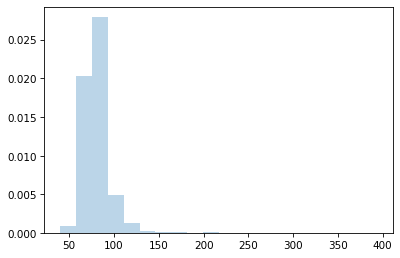

In [126]:
fig, axe = plt.subplots(dpi=75)
axe.hist(df['glucose'], bins=20, density=True, histtype='stepfilled', alpha=0.3, label="BMI")

<AxesSubplot:>

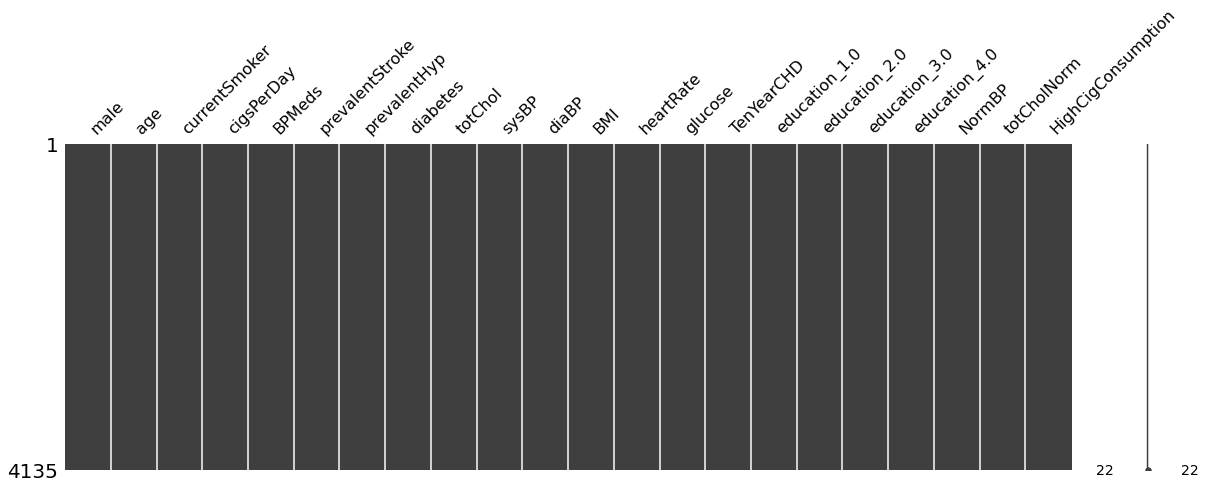

In [127]:
mno.matrix(df, figsize = (20, 6))

In [128]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
X_train.shape

(2894, 21)

In [131]:
y_train.shape

(2894,)

In [132]:
X_test.shape

(1241, 21)

In [133]:
y_test.shape

(1241,)

In [135]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,NormBP,totCholNorm,HighCigConsumption
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,...,80.0,77.0,0.0,0.0,0.0,0.0,1.0,1,1,0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,...,95.0,76.0,0.0,0.0,1.0,0.0,0.0,1,0,0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,...,75.0,70.0,0.0,1.0,0.0,0.0,0.0,1,0,1
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,...,65.0,103.0,1.0,0.0,0.0,1.0,0.0,0,1,1
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,...,85.0,85.0,0.0,0.0,0.0,1.0,0.0,1,0,1


In [137]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'NormBP',
       'totCholNorm', 'HighCigConsumption'],
      dtype='object')

In [140]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

#SMOTENC is used in case of continuous as well as categorical data
sm = SMOTENC(random_state=42,categorical_features=[0,2,4,5,6,7,14,15,16,17,18,19,20])
                                                   #male ,'currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD','education_1.0','education_2.0','education_3.0','education_4.0'])
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 421
Before OverSampling, counts of label '0': 2473 

After OverSampling, the shape of train_X: (4946, 21)
After OverSampling, the shape of train_y: (4946,) 

After OverSampling, counts of label '1': 2473
After OverSampling, counts of label '0': 2473


In [141]:
X_train_res

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,NormBP,totCholNorm,HighCigConsumption
0,0.0,43.000000,1.0,5.000000,0.0,0.0,0.0,0.0,250.000000,110.000000,...,21.140000,64.000000,85.000000,0.0,0.0,1.0,0.0,1,0,1
1,1.0,42.000000,1.0,40.000000,0.0,0.0,0.0,0.0,245.000000,105.000000,...,22.410000,65.000000,69.000000,0.0,1.0,0.0,0.0,1,0,1
2,1.0,38.000000,0.0,0.000000,0.0,0.0,1.0,0.0,256.000000,123.000000,...,25.420000,62.000000,82.000000,0.0,1.0,0.0,0.0,0,0,0
3,0.0,63.000000,0.0,0.000000,0.0,0.0,1.0,0.0,257.000000,170.000000,...,25.490000,79.000000,87.000000,1.0,0.0,0.0,0.0,0,0,0
4,1.0,48.000000,1.0,15.000000,0.0,0.0,0.0,0.0,240.000000,126.000000,...,25.820000,73.000000,60.000000,1.0,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,1.0,61.743073,1.0,21.536523,0.0,0.0,1.0,0.0,253.564232,177.435768,...,23.884433,95.486145,77.692695,1.0,0.0,0.0,0.0,0,0,1
4942,1.0,58.298851,1.0,15.747127,0.0,0.0,0.0,0.0,270.206894,127.500000,...,26.174253,76.057469,67.344829,1.0,0.0,0.0,0.0,1,0,1
4943,1.0,47.596943,1.0,18.992358,0.0,0.0,0.0,0.0,235.193886,116.996179,...,27.926742,75.000000,66.186245,1.0,0.0,0.0,0.0,1,1,1
4944,1.0,64.147630,1.0,24.672165,0.0,0.0,1.0,0.0,215.655670,148.057319,...,29.201299,81.868866,88.786804,0.0,0.0,0.0,0.0,0,1,1


# 0.72, 0.63 recall.. best

In [146]:
for i in range(1,1000,100):
    ridge_classi = RidgeClassifier(alpha= i)
    model=ridge_classi.fit(X_train_res,y_train_res)
    y_predict = model.predict(X_test)
    print("alpha is :", i)
    print(model.coef_)
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))

alpha is : 1
[[ 2.28333638e-01  2.43746729e-02 -1.62085765e-01  1.12595259e-02
  -2.53053505e-01 -2.71219841e-01  2.02157997e-01 -6.13153882e-02
   4.66552211e-04  4.15675426e-03 -7.62298534e-04 -3.98015201e-04
   2.51732510e-04  1.38624632e-03 -8.26778551e-01 -1.14806579e+00
  -1.44975090e+00 -1.23924451e+00  1.03826882e-01  2.48878188e-02
  -2.65954763e-02]]
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81      1034
         1.0       0.31      0.55      0.39       207

    accuracy                           0.72      1241
   macro avg       0.60      0.65      0.60      1241
weighted avg       0.79      0.72      0.74      1241

[[775 259]
 [ 93 114]]
alpha is : 101
[[ 2.10297278e-01  2.72985720e-02 -1.55797127e-01  1.17416344e-02
  -1.60472513e-01 -4.44672529e-02  1.68601818e-01 -4.24875925e-02
   7.65832118e-04  4.06996863e-03 -1.65013222e-04  4.33256042e-04
   4.82945460e-06  1.51142902e-03 -3.82014022e-01 -6.45454107e-01
  -8.425

# 0.71, 0.51 recall with SVC

In [147]:
svc_classifier = SVC()
parameters = {
#    'class_weight':['balanced'],
    'C': [0.2,0.8, 1,10, 1000],
    'kernel':['poly', 'rbf', 'sigmoid'],
    'degree' : [1]
    
}
model = GridSearchCV(estimator =svc_classifier,param_grid = parameters, cv = 5, scoring = 'f1' )
model_cv=model.fit(X_train_res,y_train_res)
y_predict = model_cv.predict(X_test)
#print("C is :", i/10)
    #print(model.coef_)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(model.best_estimator_)
print(model.best_params_)

              precision    recall  f1-score   support

         0.0       0.88      0.71      0.78      1034
         1.0       0.26      0.51      0.34       207

    accuracy                           0.68      1241
   macro avg       0.57      0.61      0.56      1241
weighted avg       0.77      0.68      0.71      1241

[[733 301]
 [102 105]]
SVC(C=1000, degree=1)
{'C': 1000, 'degree': 1, 'kernel': 'rbf'}


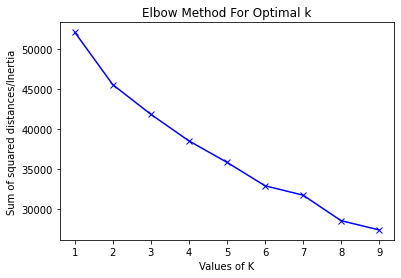

In [41]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_train_sc)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

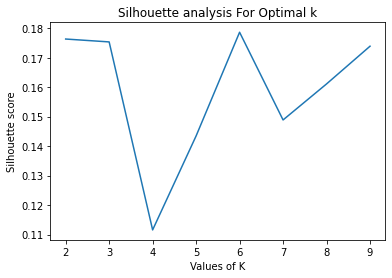

In [42]:
A=[]
K_values=range(2,10)
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train_sc)
    cluster_labels = kmeans.labels_
    B=silhouette_score(X_train_sc, cluster_labels)
    A.append(B)
plt.plot(K_values,A)  
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()